In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 25

def get_distribution_value(x: float) -> float:
    return 1 - np.exp(-x) if x > 0 else 0

def calc_inverse_value(y: float) -> float:
    return -np.log(1 - y) if y > 0 else 0

def get_sample() -> np.ndarray[float]:
    sample = []
    for i in range(n):
        y_uniform = np.random.uniform(0, 1)
        x_sample = calc_inverse_value(y_uniform)
        sample.append(x_sample)
    return np.array(sample)

def get_moda(sample: np.ndarray[float]) -> np.ndarray[float]:
    unique_values, counts = np.unique(sample, return_counts=True)
    nmax = np.max(counts)
    answ = []
    for i in range(sample.size):
        if counts[i] == nmax:
            answ.append(unique_values[i])
    return np.array(answ)

def get_med(sample: np.ndarray[float]) -> float:
    sample_sorted = np.sort(sample)
    return sample_sorted[sample_sorted.size // 2]

def get_razmah(sample: np.ndarray[float]) -> float:
    return np.max(sample) - np.min(sample)

def get_average(sample: np.ndarray[float]) -> float:
    return np.average(sample)

def get_kth_moment(sample: np.ndarray, k: int) -> float:
    result = 0
    for i in range(sample.size):
        result += sample[i] ** k
    result /= sample.size
    return result

def get_kth_central_moment(sample: np.ndarray, k: int) -> float:
    avg = get_kth_moment(sample, 1)

    result = 0
    for i in range(n):
        result += (sample[i] - avg) ** k
    return result / sample.size

def get_assimetric_evaluation(sample: np.ndarray[float]) -> float:
    mu3 = get_kth_central_moment(sample, 3)
    mu2 = get_kth_central_moment(sample, 2)
    return mu3 / (mu2 ** (3/2))


In [4]:
sample = np.sort(get_sample())
print(f"выборка: {sample}")
print(f"моды: {get_moda(sample)};\n"
      f"медиана: {get_med(sample)};\n"
      f"размах: {get_razmah(sample)};\n"
      f"оценка асимметрии: {get_assimetric_evaluation(sample)}\n"
    )

выборка: [0.05968783 0.06862741 0.137001   0.15889552 0.16710444 0.31477275
 0.31874777 0.48301395 0.49763657 0.56086356 0.7027724  0.78854368
 0.86993902 0.96480054 1.01354022 1.0575749  1.16954885 1.18813989
 1.21061388 1.24754514 1.29744093 1.59949338 2.37063401 4.1057921
 4.31333325]
моды: [0.05968783 0.06862741 0.137001   0.15889552 0.16710444 0.31477275
 0.31874777 0.48301395 0.49763657 0.56086356 0.7027724  0.78854368
 0.86993902 0.96480054 1.01354022 1.0575749  1.16954885 1.18813989
 1.21061388 1.24754514 1.29744093 1.59949338 2.37063401 4.1057921
 4.31333325];
медиана: 0.869939021103033;
размах: 4.253645420562315;
оценка асимметрии: 1.9165285213172283



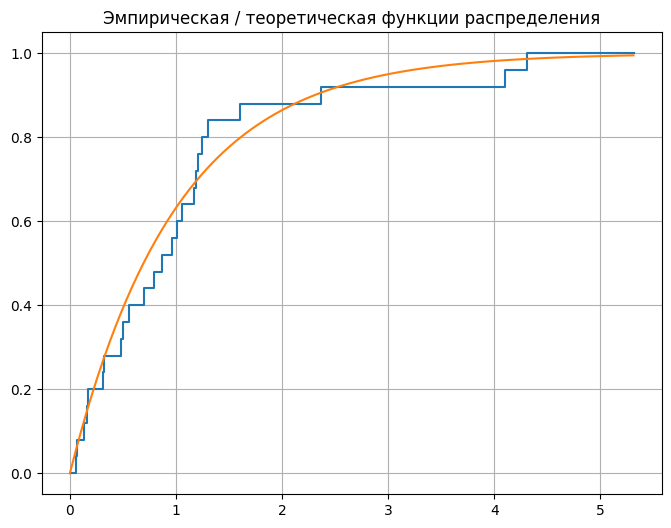

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.grid()

xcoords = np.hstack((np.array([0]), sample, np.array(np.max(sample) + 1)))
ycoords = np.array([0] + [i / n for i in range(0, n + 1)])
ax.step(xcoords, ycoords)
t = np.linspace(0, np.max(sample) + 1, 100)
vals = [get_distribution_value(i) for i in t]

ax.plot(t, vals)
ax.set_title("Эмпирическая / теоретическая функции распределения")
print()

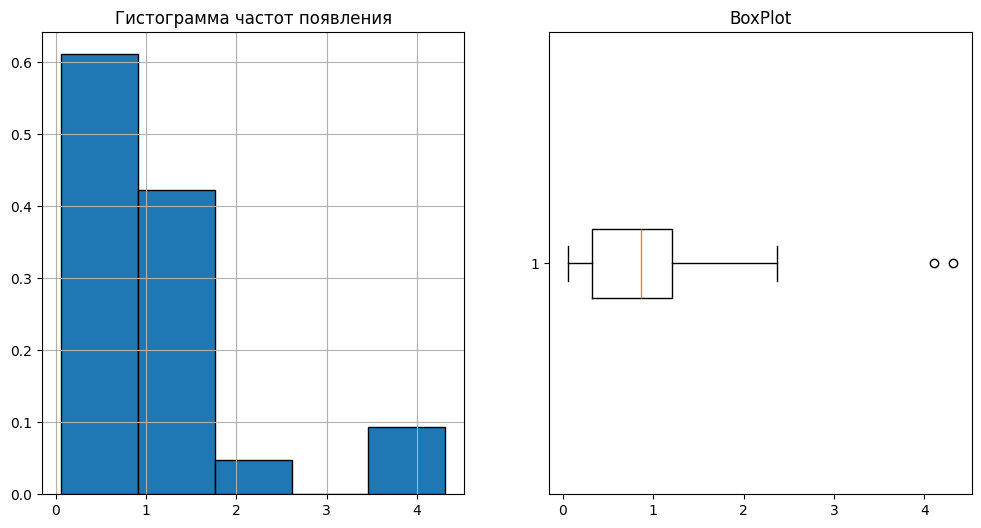

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].grid()

cnt_of_pills = 1 + int(np.log2(n))
axes[0].hist(sample, bins=cnt_of_pills, edgecolor='black', density=True)
axes[1].boxplot(sample, orientation='horizontal')
axes[0].set_title("Гистограмма частот появления")
axes[1].set_title("BoxPlot")
print()

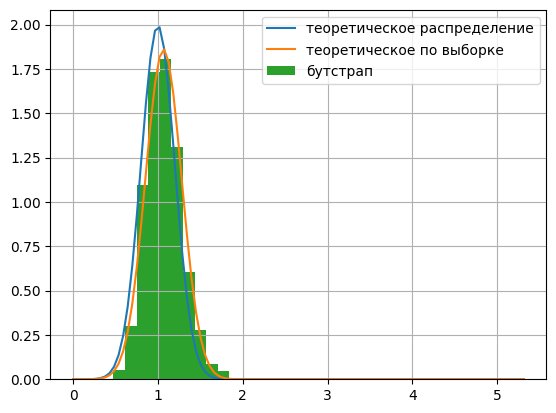

In [7]:
def normal_density(avg: float, std: float, x: float) -> float:
    return 1 / np.sqrt(2 * np.pi * std ** 2) * np.exp(-(x - avg) ** 2 / (2 * std ** 2))

def do_bootstrap(cnt: int, sample: np.ndarray, param_func) -> np.ndarray:
    """
    Здесь просто генерация выборок
    """
    answ = []
    for i in range(cnt):
        podviborka = []
        for j in range(sample.size):
            index = np.random.randint(0, n)
            podviborka.append(sample[index])
        podviborka = np.array(podviborka)
        answ.append(param_func(podviborka))
    return np.array(answ)

plt.grid()


t = np.linspace(0, np.max(sample) + 1, 100)
vals = [normal_density(1, 0.2, i) for i in t]
vals_sample = [normal_density(get_average(sample), (get_kth_central_moment(sample, 2) / n) ** 0.5, i) for i in t]
plt.plot(t, vals, label="теоретическое распределение")
plt.plot(t, vals_sample, label="теоретическое по выборке")
boots = do_bootstrap(1000, sample, get_average)
cnt_of_pills = 1 + int(np.log2(1000))
plt.hist(boots, bins = cnt_of_pills, density=True, label="бутстрап")
plt.legend()
print()

оценка коэффициента асимметрии по bootstrap: 0.118



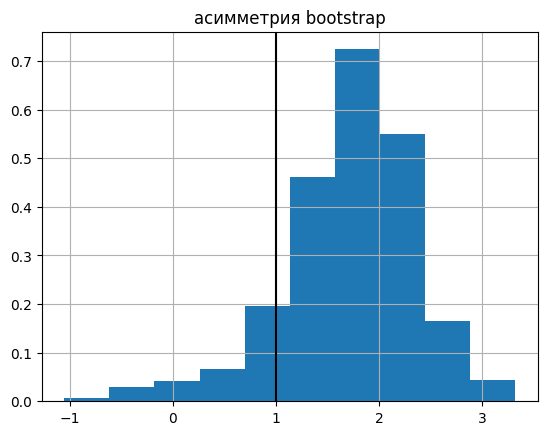

In [8]:
boots = do_bootstrap(1000, sample, get_assimetric_evaluation)
print(f"оценка коэффициента асимметрии по bootstrap: {np.sum(boots < 1) / boots.size}")
cnt_of_pills = 1 + int(np.log2(1000))
plt.grid()
plt.hist(boots, bins=cnt_of_pills, density=True)
plt.axvline(x=1, color="black")
plt.title("асимметрия bootstrap")
print()

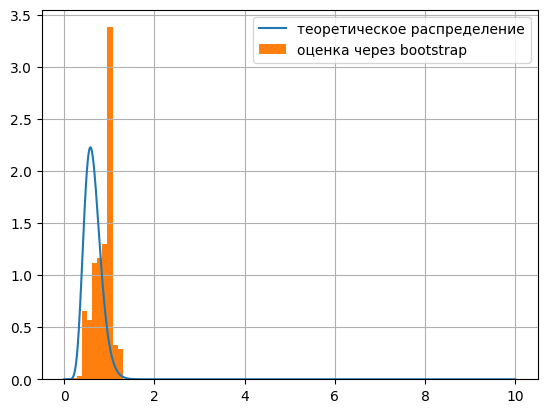

In [9]:
def fact(n: int) -> int:
    answ = 1
    for i in range(2, n+1):
        answ *= i
    return answ

def get_fi_k(k: int, x: float) -> float:
    """
    Пояснение к формуле на одном из фото
    """
    return np.exp(-x) * (fact(n) / fact(n - k) / fact(k - 1)) * (1 - np.exp(-x)) ** (k - 1) * (np.exp(-x)) ** (n - k)

plt.grid()
t = np.linspace(0, 10, 1000)
vals = [get_fi_k(n // 2, x) for x in t]
boots = do_bootstrap(1000, sample, get_med)
plt.plot(t, vals, label="теоретическое распределение")
plt.hist(boots, bins=cnt_of_pills, density=True, label="оценка через bootstrap")
plt.legend()
print()